顔の座標= 934 903 1272 1272


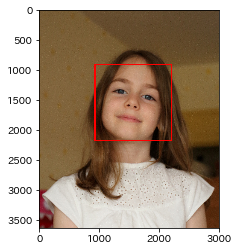

In [8]:
import matplotlib.pyplot as plt
import cv2

# カスケードファイルを指定して分類機を作成 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込んでグレイスケールに変換する --- (*2)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 結果を確認 --- (*4)
if len(face_list) == 0:
    print("顔認識に失敗")
    quit()
# 認識した部分に印をつける --- (*5)
for (x,y,w,h) in face_list:
    print("顔の座標=", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

#画像を出力
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



顔の座標= 934 903 1272 1272


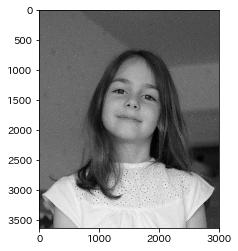

In [14]:
import matplotlib.pyplot as plt
import cv2

# カスケードファイルを指定して分類機を作成 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込んでグレイスケールに変換する --- (*2)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 結果を確認 --- (*4)
if len(face_list) == 0:
    print("顔認識に失敗")
    quit()
# 認識した部分に印をつける --- (*5)
for (x,y,w,h) in face_list:
    print("顔の座標=", x, y, w, h)
    red = (0, 0, 255)
    #cv2.rectangle(img_gray, (x, y), (x+w, y+h), red, thickness=20)

#画像を出力
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap="gray")
plt.show()



In [15]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',
 'BORDER_REFLECT_101',
 'BORDER_REPLICATE',
 'BORDER_TRANSPARENT',
 'BORDER_WRAP',
 'BOWImgDescr

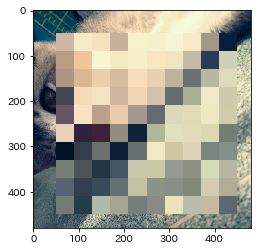

In [2]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 画像を読み込んでモザイクをかける
img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

# モザイクをかけた画像を出力
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()



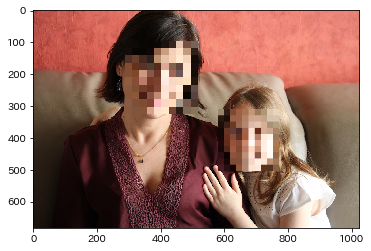

In [7]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# カスケードファイルを指定して分類機を作成
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込んでグレイスケールに変換
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()
# 認識した部分の画像にモザイクをかける
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

#画像を出力
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



---0---
顔の座標= 318 308 408 408
---10---
顔の座標= 393 384 413 413
---20---
顔の座標= 452 445 408 408
---30---
顔の座標= 497 485 403 403
---40---
---50---
---60---
---70---
---80---


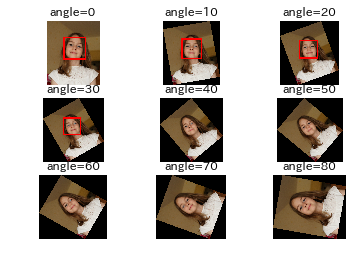

In [21]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 検出器と画像の読み込み
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")

# 顔検出を実行し、印をつける
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 認識した部分に印をつける
    for (x,y,w,h) in face_list:
        print("顔の座標=", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

# 角度毎に検証する
for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()
